In [804]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
%matplotlib notebook

In [806]:
data = pd.read_csv('task2.csv')

In [807]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0.0,299.648750,10.0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0.0,298.196675,7.0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0.0,296.245070,4.0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0.0,300.912238,3.0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0.0,319.939717,9.0,20.84


In [758]:
data.shape

(750, 11)

In [759]:
data.dropna(inplace=True)

In [760]:
data = data[np.isfinite(data['X10'])]

<IPython.core.display.Javascript object>


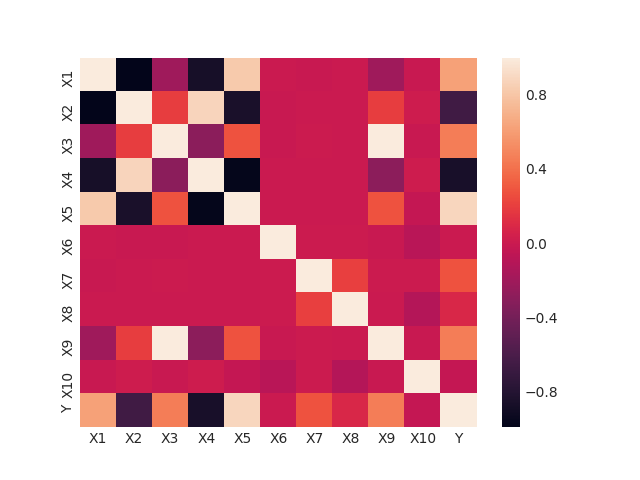

In [808]:
sns.heatmap(pd.DataFrame(data).corr())
plt.show()

<IPython.core.display.Javascript object>


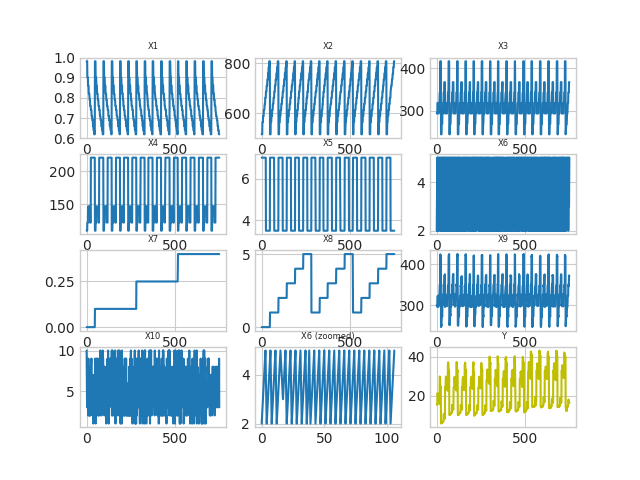

In [792]:
for i, col in enumerate(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']):
    plt.subplot(4,3,i+1)
    plt.plot(data[col])
    plt.title(col, fontsize=6)
plt.subplot(4,3,i+2)
plt.plot(data['X6'][:100])
plt.title('X6 (zoomed)', fontsize=6)
plt.subplot(4,3,i+3)
plt.plot(data['Y'], c='y')
plt.title('Y', fontsize=6)
plt.show()

<IPython.core.display.Javascript object>


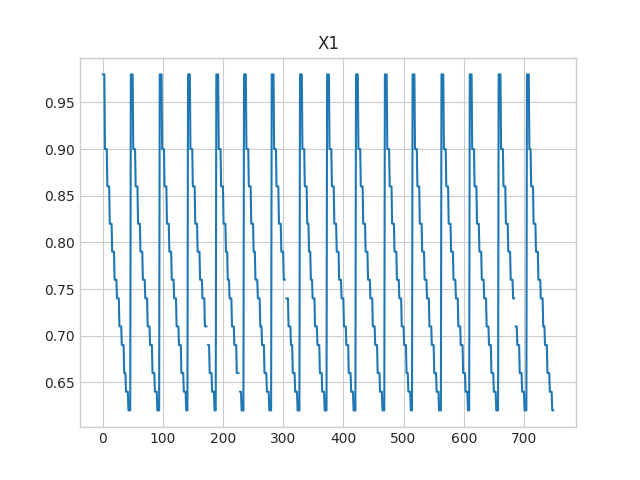

In [799]:
plt.plot(data.X1)
plt.title('X1')
plt.show()

In [800]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
count,742.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,725.000000,750.000000,735.000000,750.000000
mean,0.765647,670.712000,318.042667,176.334667,5.259333,3.494667,0.234533,2.777931,322.590942,5.423129,22.326128
std,0.106226,88.104216,43.523610,45.212958,1.751143,1.122342,0.133308,1.546359,43.594243,2.554956,10.065704
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,246.053444,1.000000,6.010000
25%,0.690000,588.000000,294.000000,122.500000,3.500000,2.000000,0.100000,1.000000,297.451108,3.000000,13.000000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,3.000000,0.250000,3.000000,322.002349,5.000000,19.090000
75%,0.860000,735.000000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,347.732239,8.000000,31.655000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,424.362724,10.000000,43.100000


In [743]:
data.dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6       int64
X7     float64
X8     float64
X9     float64
X10    float64
Y      float64
dtype: object

# Preporcessing

In [511]:
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler

In [860]:
for entry in data.iterrows():
    if entry[1].X1 != entry[1].X1:
        if len(set(data.loc[entry[0]-4:entry[0]-1].X1))==1:
            data.at[entry[0],'X1'] = data.loc[entry[0]+1].X1
        else:
            data.at[entry[0],'X1'] = data.loc[entry[0]-1].X1

In [861]:
for entry in data.iterrows():
    if entry[1].X8 != entry[1].X8:
        data.at[entry[0],'X8'] = data.loc[entry[0]-1].X8

In [862]:
for entry in data.iterrows():
    if entry[1].X10 != entry[1].X10:
        data.at[entry[0],'X10'] = 0

In [863]:
for col in ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']:
    est = KBinsDiscretizer(n_bins=len(data[col].value_counts()), encode='ordinal')
    data[col] = est.fit_transform(data[[col]])

In [864]:
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0,5))
data['X9'] = scaler.fit_transform(data[['X9']])

In [749]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,5.538667,6.382667,3.394667,2.160000,0.502667,3.494667,1.876000,2.798667,2.146201,5.314667,22.326128
std,3.452593,3.334725,1.888472,0.990475,0.500327,1.122342,0.928317,1.547037,1.222433,2.640887,10.065704
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.010000
25%,3.000000,3.000000,2.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.441250,3.000000,13.000000
50%,6.000000,6.000000,4.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.129696,5.000000,19.090000
75%,9.000000,9.000000,5.000000,3.000000,1.000000,5.000000,3.000000,4.000000,2.851192,7.000000,31.655000
max,11.000000,11.000000,6.000000,3.000000,1.000000,5.000000,3.000000,5.000000,5.000000,10.000000,43.100000


# Model Fitting

In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [750]:
data.drop('X10', axis=1, inplace=True)

In [865]:
features = data.drop('Y', axis=1)
target = data['Y']

In [882]:
rf = RandomForestRegressor(n_estimators=10)
dt = DecisionTreeRegressor(criterion='mse')
rr = Ridge(alpha=0.1)
sv = SVR(kernel='linear')

In [897]:
rf_score = cross_val_score(rf, features, target, scoring='r2', cv=10)
dt_score = cross_val_score(dt, features, target, scoring='r2', cv=10)
rr_score = cross_val_score(rr, features, target, scoring='r2', cv=10)
sv_score = cross_val_score(sv, features, target, scoring='r2', cv=10)

print('Decision Tree:', dt_score.mean(), '+-', dt_score.std())
print('Random Forest:', rf_score.mean(), '+-', rf_score.std())
print('Ridge Regression:', rr_score.mean(), '+-', rr_score.std())
print('Support Vector Machine:', sv_score.mean(), '+-', sv_score.std())

Decision Tree: 0.9636464876165167 +- 0.0867052198969667
Random Forest: 0.9669366464710774 +- 0.0849968743280096
Ridge Regression: 0.9051134124982614 +- 0.04981617177718885
Support Vector Machine: 0.9029784978347436 +- 0.045058590514759154


In [900]:
scores = []
param_range = range(1,20,1)

for param in param_range:
    reg = DecisionTreeRegressor(max_depth=param)
    score = cross_val_score(reg, features[['X2','X7']], target, scoring='r2', cv=10)
    scores.append(score.mean())

<IPython.core.display.Javascript object>


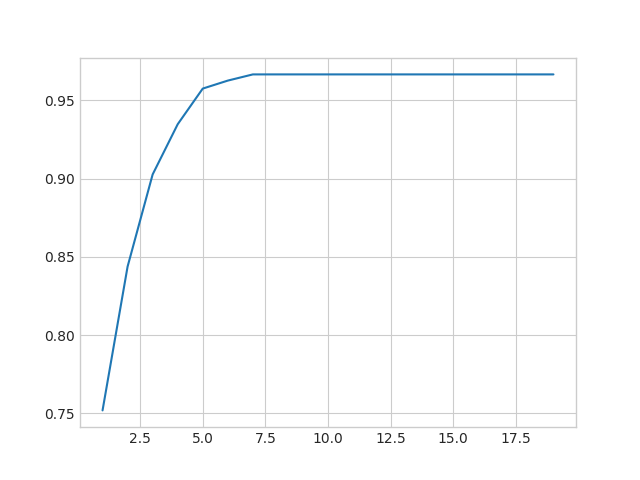

In [901]:
plt.plot(param_range, scores)
plt.show()